In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
mobilenet_df = pd.read_csv("./results/mobilenet-runs.csv")
efficientnet_df = pd.read_csv("./results/efficientnet-runs.csv")

mobilenet_test_df = pd.read_csv("./results/mobilenet-test.csv")
efficientnet_test_df = pd.read_csv("./results/efficientnet-test.csv")

In [105]:
mobilenet_df.head()

,Name,epochs,f1_score,false_negatives,false_positives,loss,precision,recall,true_negatives,true_positives,val_f1_score,val_false_negatives,val_false_positives,val_loss,val_precision,val_recall,val_true_negatives,val_true_positives
0,winter-yogurt-164,100,0.885434,122,122,0.280625,0.880743,0.880743,901,901,0.877551,6,6,0.343751,0.877551,0.877551,43,43
1,major-leaf-167,100,0.885434,122,122,0.283358,0.880743,0.880743,901,901,0.859022,7,7,0.380588,0.857143,0.857143,42,42
2,dauntless-firefly-163,100,0.877921,130,130,0.299820,0.872923,0.872923,893,893,0.836735,8,8,0.372640,0.836735,0.836735,41,41
3,rich-lake-165,100,0.878115,130,130,0.298770,0.872923,0.872923,893,893,0.854990,7,7,0.397050,0.857143,0.857143,42,42
4,young-aardvark-166,100,0.871701,137,137,0.293635,0.866080,0.866080,886,886,0.836735,8,8,0.362217,0.836735,0.836735,41,41


In [106]:
efficientnet_df.head()

,Name,epochs,f1_score,false_negatives,false_positives,loss,precision,recall,true_negatives,true_positives,val_f1_score,val_false_negatives,val_false_positives,val_loss,val_precision,val_recall,val_true_negatives,val_true_positives
0,lucky-darkness-170,100,0.936259,67,67,0.197690,0.934506,0.934506,956,956,0.877551,6,6,0.275659,0.877551,0.877551,43,43
1,astral-forest-171,100,0.930686,73,73,0.201519,0.928641,0.928641,950,950,0.854990,7,7,0.270521,0.857143,0.857143,42,42
2,morning-durian-168,100,0.940806,62,62,0.196837,0.939394,0.939394,961,961,0.877551,6,6,0.320863,0.877551,0.877551,43,43
3,dutiful-eon-169,100,0.940806,62,62,0.192650,0.939394,0.939394,961,961,0.854990,7,7,0.323886,0.857143,0.857143,42,42
4,comic-resonance-172,100,0.941909,61,61,0.194092,0.940371,0.940371,962,962,0.854990,7,7,0.294735,0.857143,0.857143,42,42


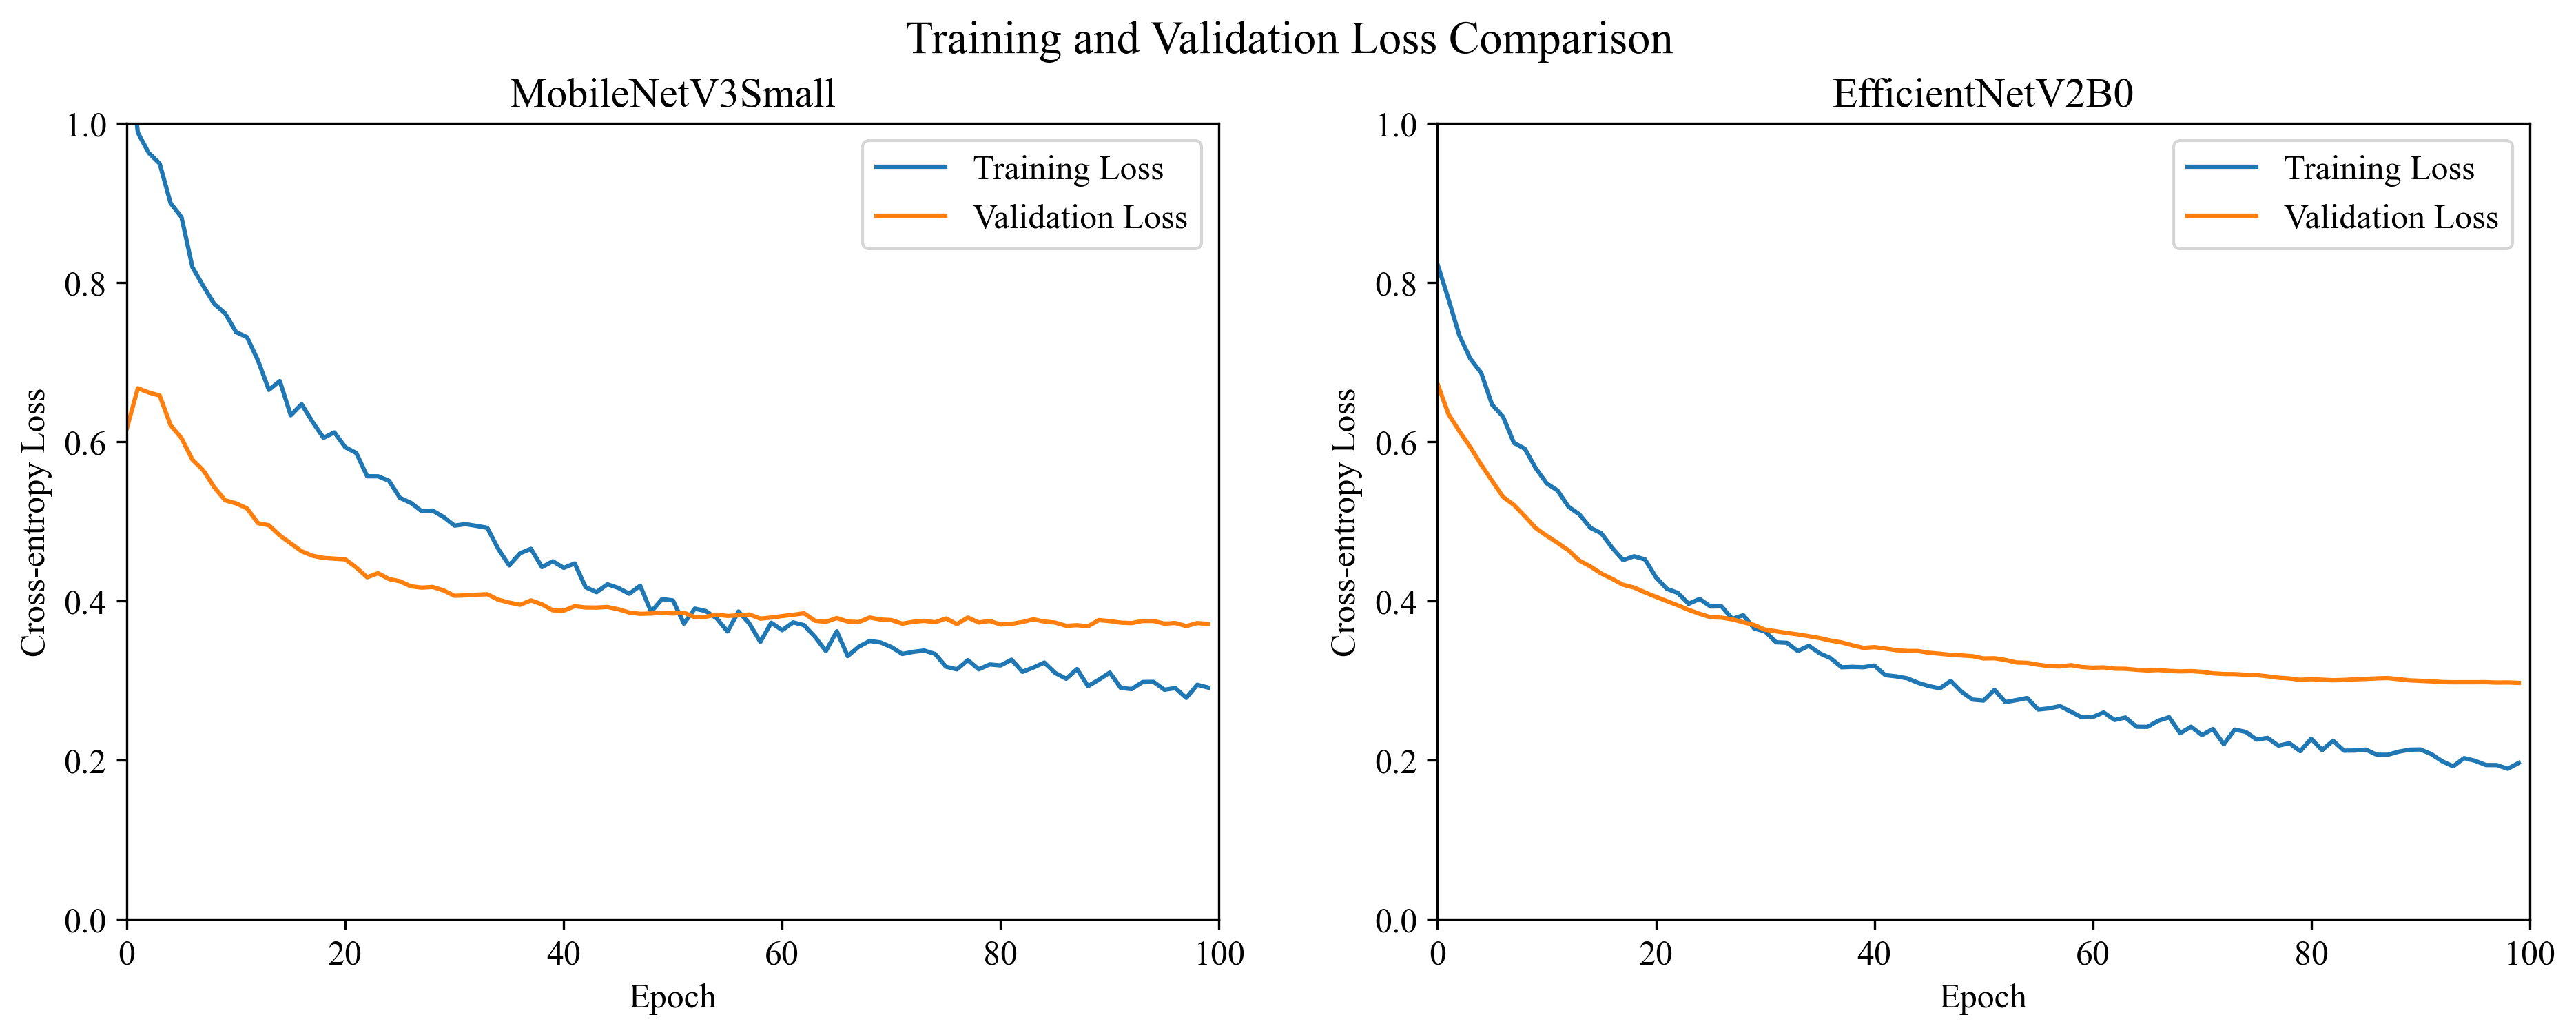

In [171]:
mobilenet_trainloss = pd.read_csv("results/mobilenet-trainloss.csv")
efficientnet_trainloss = pd.read_csv("results/efficientnet-trainloss.csv")

mobilenet_validloss = pd.read_csv("results/mobilenet-validloss.csv")
efficientnet_validloss = pd.read_csv("results/efficientnet-validloss.csv")

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300, figsize=(15, 5))

ax1.plot(
    mobilenet_trainloss["Step"],
    mobilenet_trainloss["Grouped runs - loss"],
    label="Training Loss",
)
ax1.plot(
    mobilenet_validloss["Step"],
    mobilenet_validloss["Grouped runs - val_loss"],
    label="Validation Loss",
)

ax2.plot(
    efficientnet_trainloss["Step"],
    efficientnet_trainloss["Grouped runs - loss"],
    label="Training Loss",
)
ax2.plot(
    efficientnet_validloss["Step"],
    efficientnet_validloss["Grouped runs - val_loss"],
    label="Validation Loss",
)

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Cross-entropy Loss")
ax1.set_title("MobileNetV3Small")
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 1)
ax1.legend()

ax2.set_xlabel("Epoch")
ax2.set_ylabel("Cross-entropy Loss")
ax2.set_title("EfficientNetV2B0")
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 1)
ax2.legend()

plt.suptitle("Training and Validation Loss Comparison", fontsize=16)
plt.show()

In [107]:
# plot fnr using false_negatives / (true_positives + false_negatives)
mobilenet_df["fnr"] = mobilenet_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)
efficientnet_df["fnr"] = efficientnet_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)

# F1-Score


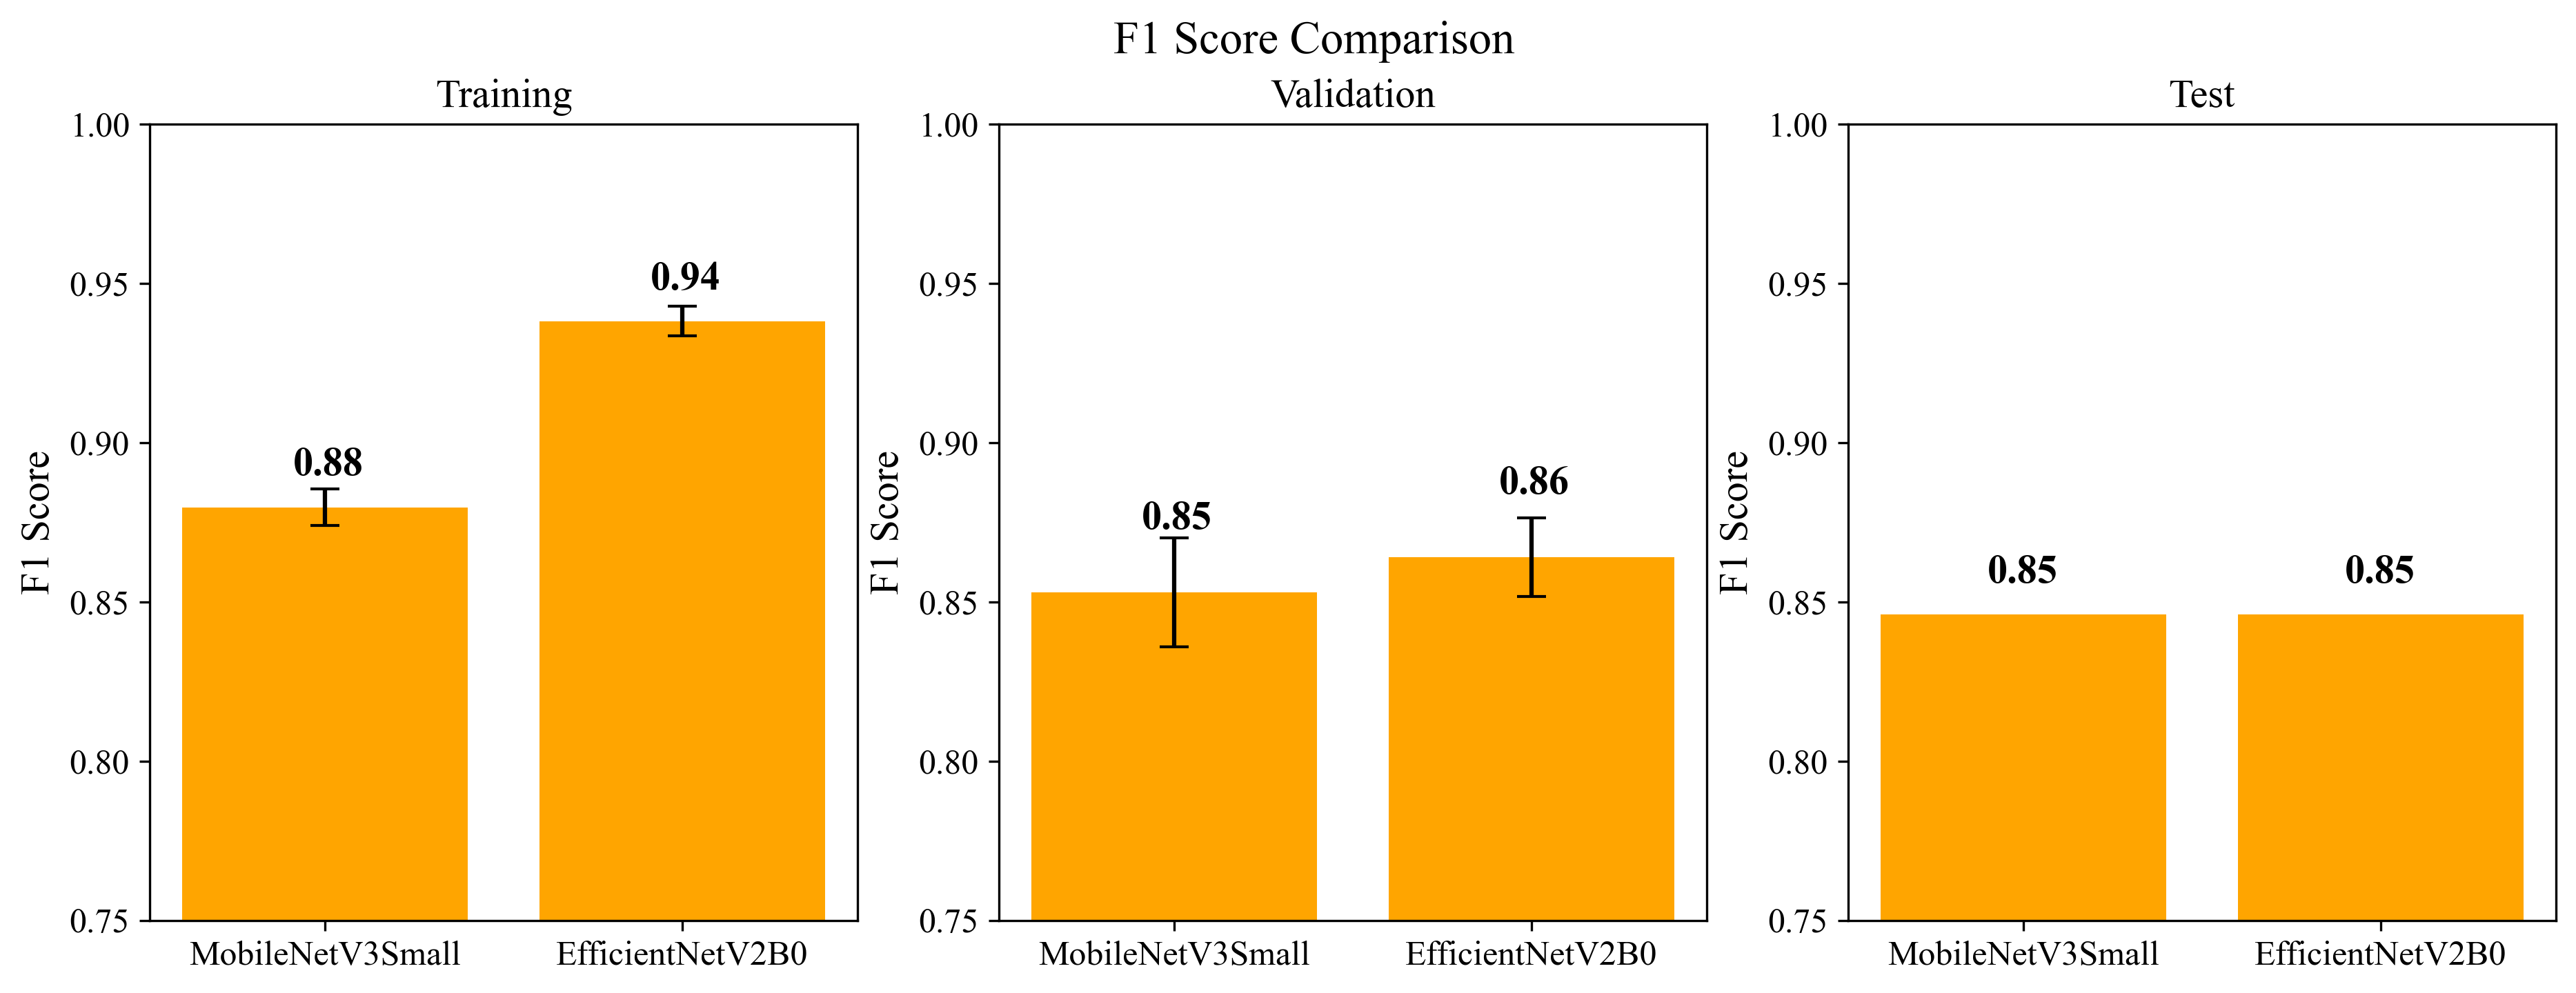

In [155]:
# make font readable on paper
plt.rcParams.update({"font.size": 12})
plt.rcParams["font.family"] = "Times New Roman"

# Plot two subplots for each model with each plot containing the average f1 score with error bars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=300, figsize=(15, 5))
ax1.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [mobilenet_df["f1_score"].mean(), efficientnet_df["f1_score"].mean()],
    yerr=[
        mobilenet_df["f1_score"].std(),
        efficientnet_df["f1_score"].std(),
    ],
    capsize=5,
    color="orange",
)

# place center scores on top of bars
for i, v in enumerate(
    [mobilenet_df["f1_score"].mean(), efficientnet_df["f1_score"].mean()]
):
    ax1.text(
        i - 0.09,
        v + 0.01,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )


ax1.set_title("Training", fontname="Times New Roman", fontsize=14)
ax1.set_ylabel("F1 Score", fontname="Times New Roman", fontsize=14)
ax1.set_ylim([0.75, 1])

ax2.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [mobilenet_df["val_f1_score"].mean(), efficientnet_df["val_f1_score"].mean()],
    yerr=[
        mobilenet_df["val_f1_score"].std(),
        efficientnet_df["val_f1_score"].std(),
    ],
    capsize=5,
    color="orange",
)

# place center scores on top of bars
for i, v in enumerate(
    [mobilenet_df["val_f1_score"].mean(), efficientnet_df["val_f1_score"].mean()]
):
    ax2.text(
        i - 0.09,
        v + 0.02,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )

ax2.set_title("Validation", fontname="Times New Roman", fontsize=14)
ax2.set_ylabel("F1 Score", fontname="Times New Roman", fontsize=14)
ax2.set_ylim([0.75, 1])

# plot test f1 scores
ax3.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [
        mobilenet_test_df["f1_score"].squeeze(),
        efficientnet_test_df["f1_score"].squeeze(),
    ],
    color="orange",
)
# place center scores on top of bars
for i, v in enumerate(
    [
        mobilenet_test_df["f1_score"].squeeze(),
        efficientnet_test_df["f1_score"].squeeze(),
    ]
):
    ax3.text(
        i - 0.1,
        v + 0.01,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )

ax3.set_title("Test", fontname="Times New Roman", fontsize=14)
ax3.set_ylabel("F1 Score", fontname="Times New Roman", fontsize=14)
ax3.set_ylim([0.75, 1])

fig.suptitle("F1 Score Comparison", fontname="Times New Roman", fontsize=16)
plt.show()

# FNR


In [109]:
mobilenet_df["fnr"] = mobilenet_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)
efficientnet_df["fnr"] = efficientnet_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)

mobilenet_df["val_fnr"] = mobilenet_df.apply(
    lambda row: row["val_false_negatives"]
    / (row["val_true_positives"] + row["val_false_negatives"]),
    axis=1,
)

efficientnet_df["val_fnr"] = efficientnet_df.apply(
    lambda row: row["val_false_negatives"]
    / (row["val_true_positives"] + row["val_false_negatives"]),
    axis=1,
)

mobilenet_test_df["fnr"] = mobilenet_test_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)

efficientnet_test_df["fnr"] = efficientnet_test_df.apply(
    lambda row: row["false_negatives"]
    / (row["true_positives"] + row["false_negatives"]),
    axis=1,
)

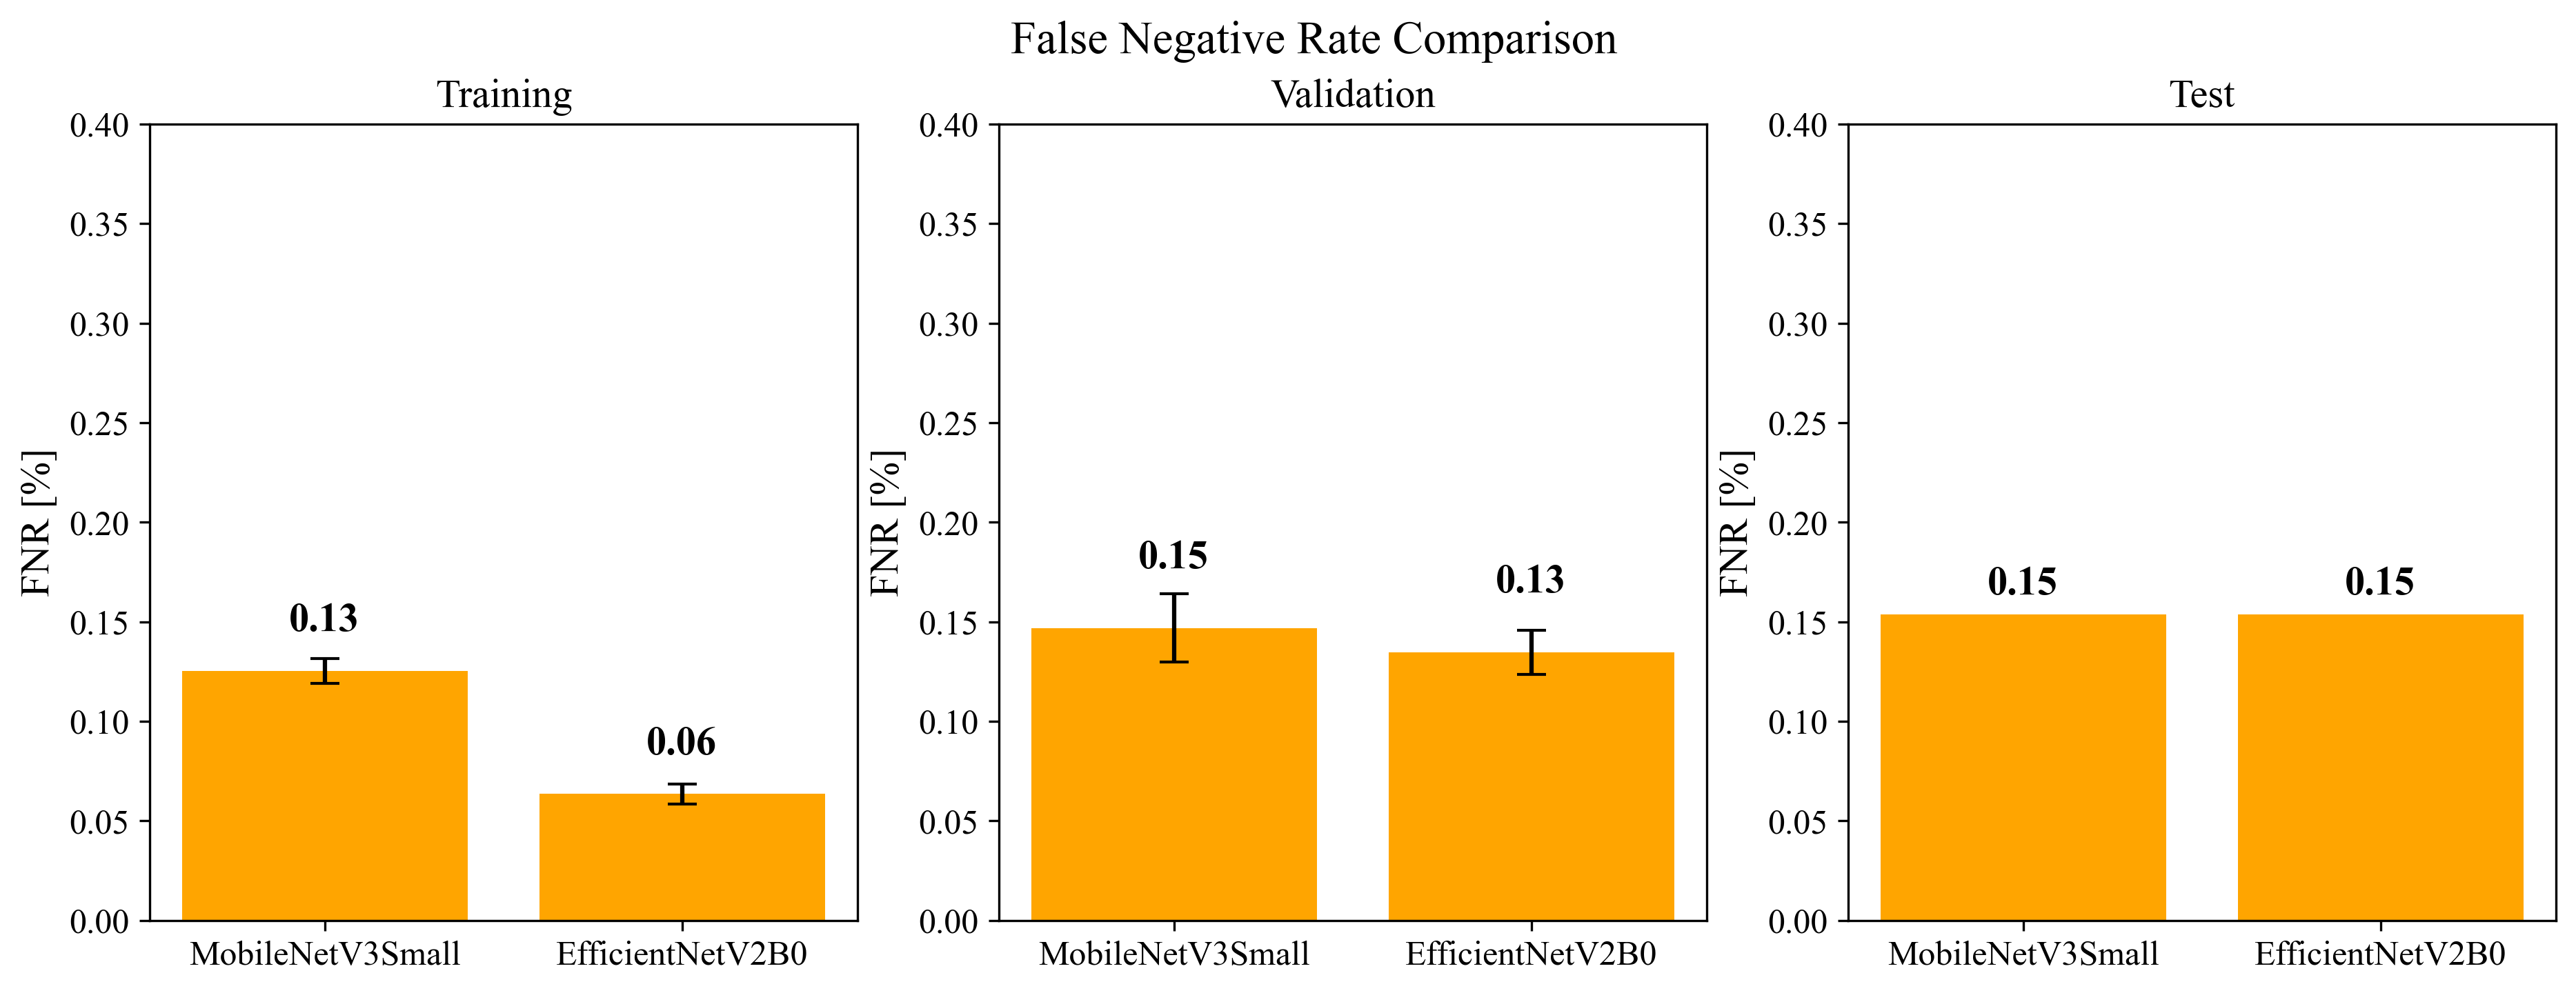

In [172]:
# Plot two subplots for each model with each plot containing the average f1 score with error bars
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=300, figsize=(15, 5))
ax1.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [mobilenet_df["fnr"].mean(), efficientnet_df["fnr"].mean()],
    yerr=[
        mobilenet_df["fnr"].std(),
        efficientnet_df["fnr"].std(),
    ],
    capsize=5,
    color="orange",
)

# place center scores on top of bars
for i, v in enumerate([mobilenet_df["fnr"].mean(), efficientnet_df["fnr"].mean()]):
    ax1.text(
        i - 0.1,
        v + 0.02,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )


ax1.set_title("Training", fontname="Times New Roman", fontsize=14)
ax1.set_ylabel("FNR [%]", fontname="Times New Roman", fontsize=14)
ax1.set_ylim([0.0, 0.4])

ax2.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [mobilenet_df["val_fnr"].mean(), efficientnet_df["val_fnr"].mean()],
    yerr=[
        mobilenet_df["val_fnr"].std(),
        efficientnet_df["val_fnr"].std(),
    ],
    capsize=5,
    color="orange",
)

# place center scores on top of bars
for i, v in enumerate(
    [mobilenet_df["val_fnr"].mean(), efficientnet_df["val_fnr"].mean()]
):
    ax2.text(
        i - 0.1,
        v + 0.03,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )

ax2.set_title("Validation", fontname="Times New Roman", fontsize=14)
ax2.set_ylabel("FNR [%]", fontname="Times New Roman", fontsize=14)
ax2.set_ylim([0.0, 0.4])

# plot test f1 scores
ax3.bar(
    ["MobileNetV3Small", "EfficientNetV2B0"],
    [
        mobilenet_test_df["fnr"].squeeze(),
        efficientnet_test_df["fnr"].squeeze(),
    ],
    color="orange",
)
# place center scores on top of bars
for i, v in enumerate(
    [
        mobilenet_test_df["fnr"].squeeze(),
        efficientnet_test_df["fnr"].squeeze(),
    ]
):
    ax3.text(
        i - 0.1,
        v + 0.01,
        str(round(v, 2)),
        color="black",
        fontweight="bold",
        fontsize=14,
    )

ax3.set_title("Test", fontname="Times New Roman", fontsize=14)
ax3.set_ylabel("FNR [%]", fontname="Times New Roman", fontsize=14)
ax3.set_ylim([0.0, 0.4])

fig.suptitle("False Negative Rate Comparison", fontname="Times New Roman", fontsize=16)
plt.show()

# AUC-ROC Curve


In [129]:
efficientnet_train_preds = pd.read_csv("./predictions/efficientnet-train-preds.csv")
mobilenet_train_preds = pd.read_csv("./predictions/mobilenet-train-preds.csv")

efficientnet_valid_preds = pd.read_csv("./predictions/efficientnet-valid-preds.csv")
mobilenet_valid_preds = pd.read_csv("./predictions/mobilenet-valid-preds.csv")

efficientnet_test_preds = pd.read_csv("./predictions/efficientnet-test-preds.csv")
mobilenet_test_preds = pd.read_csv("./predictions/mobilenet-test-preds.csv")

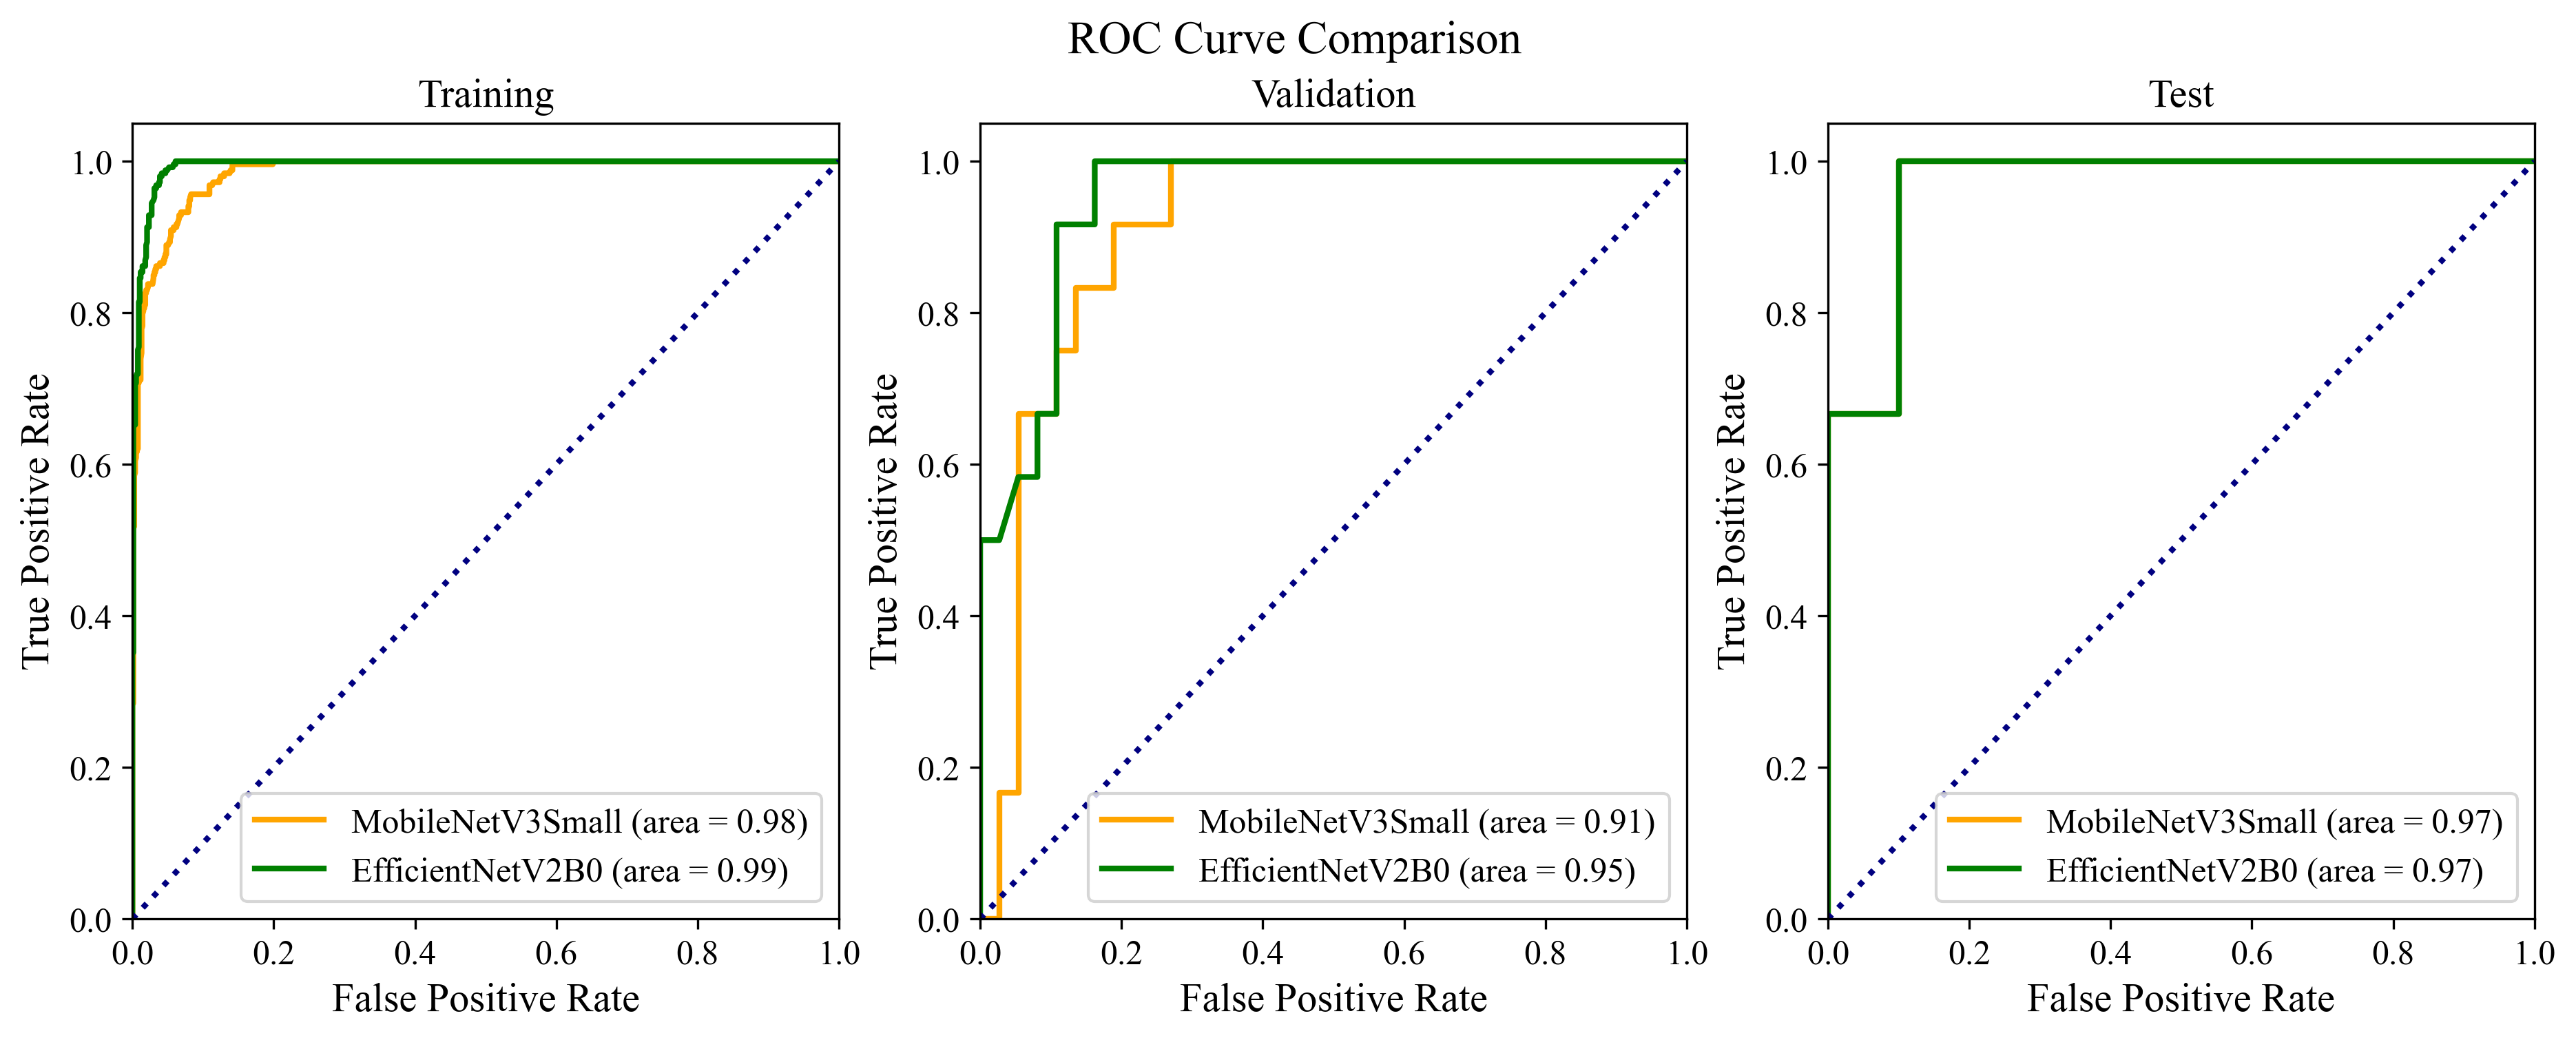

In [156]:
# Create auc-roc curve for each model
from sklearn.metrics import roc_curve, auc


mobilenet_train_fpr, mobilenet_train_tpr, _ = roc_curve(
    mobilenet_train_preds["actual"],
    mobilenet_train_preds["predicted"],
)

efficientnet_train_fpr, efficientnet_train_tpr, _ = roc_curve(
    efficientnet_train_preds["actual"],
    efficientnet_train_preds["predicted"],
)

mobilenet_valid_fpr, mobilenet_valid_tpr, _ = roc_curve(
    mobilenet_valid_preds["actual"],
    mobilenet_valid_preds["predicted"],
)

efficientnet_valid_fpr, efficientnet_valid_tpr, _ = roc_curve(
    efficientnet_valid_preds["actual"],
    efficientnet_valid_preds["predicted"],
)

mobilenet_test_fpr, mobilenet_test_tpr, _ = roc_curve(
    mobilenet_test_preds["actual"],
    mobilenet_test_preds["predicted"],
)

efficientnet_test_fpr, efficientnet_test_tpr, _ = roc_curve(
    efficientnet_test_preds["actual"],
    efficientnet_test_preds["predicted"],
)

mobilenet_train_roc_auc = auc(mobilenet_train_fpr, mobilenet_train_tpr)
efficientnet_train_roc_auc = auc(efficientnet_train_fpr, efficientnet_train_tpr)

mobilenet_valid_roc_auc = auc(mobilenet_valid_fpr, mobilenet_valid_tpr)
efficientnet_valid_roc_auc = auc(efficientnet_valid_fpr, efficientnet_valid_tpr)

mobilenet_test_roc_auc = auc(mobilenet_test_fpr, mobilenet_test_tpr)
efficientnet_test_roc_auc = auc(efficientnet_test_fpr, efficientnet_test_tpr)

# Plot auc-roc curve
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=300, figsize=(15, 5))


ax1.plot(
    mobilenet_train_fpr,
    mobilenet_train_tpr,
    color="orange",
    lw=2,
    label=f"MobileNetV3Small (area = {mobilenet_train_roc_auc:0.2f})",
)

ax1.plot(
    efficientnet_train_fpr,
    efficientnet_train_tpr,
    color="green",
    lw=2,
    label=f"EfficientNetV2B0 (area = {efficientnet_train_roc_auc:0.2f})",
)
ax1.legend(loc="lower right")
ax1.set_xlabel("False Positive Rate", fontname="Times New Roman", fontsize=14)
ax1.set_ylabel("True Positive Rate", fontname="Times New Roman", fontsize=14)
ax1.plot([0, 1], [0, 1], color="navy", lw=2, linestyle=":")
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_title("Training", fontname="Times New Roman", fontsize=14)

ax2.plot(
    mobilenet_valid_fpr,
    mobilenet_valid_tpr,
    color="orange",
    lw=2,
    label=f"MobileNetV3Small (area = {mobilenet_valid_roc_auc:0.2f})",
)

ax2.plot(
    efficientnet_valid_fpr,
    efficientnet_valid_tpr,
    color="green",
    lw=2,
    label=f"EfficientNetV2B0 (area = {efficientnet_valid_roc_auc:0.2f})",
)
ax2.legend(loc="lower right")
ax2.set_xlabel("False Positive Rate", fontname="Times New Roman", fontsize=14)
ax2.set_ylabel("True Positive Rate", fontname="Times New Roman", fontsize=14)
ax2.plot([0, 1], [0, 1], color="navy", lw=2, linestyle=":")
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_title("Validation", fontname="Times New Roman", fontsize=14)

ax3.plot(
    mobilenet_test_fpr,
    mobilenet_test_tpr,
    color="orange",
    lw=2,
    label=f"MobileNetV3Small (area = {mobilenet_test_roc_auc:0.2f})",
)

ax3.plot(
    efficientnet_test_fpr,
    efficientnet_test_tpr,
    color="green",
    lw=2,
    label=f"EfficientNetV2B0 (area = {efficientnet_test_roc_auc:0.2f})",
)
ax3.legend(loc="lower right")
ax3.set_xlabel("False Positive Rate", fontname="Times New Roman", fontsize=14)
ax3.set_ylabel("True Positive Rate", fontname="Times New Roman", fontsize=14)
ax3.plot([0, 1], [0, 1], color="navy", lw=2, linestyle=":")
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.set_title("Test", fontname="Times New Roman", fontsize=14)

fig.suptitle("ROC Curve Comparison", fontname="Times New Roman", fontsize=16)
plt.show()